In [1]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
from skimage import data

In [2]:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_text.html#sphx-glr-auto-examples-applications-plot-text-py

img = data.cat()
img.dtype, img.shape

(dtype('uint8'), (300, 451, 3))

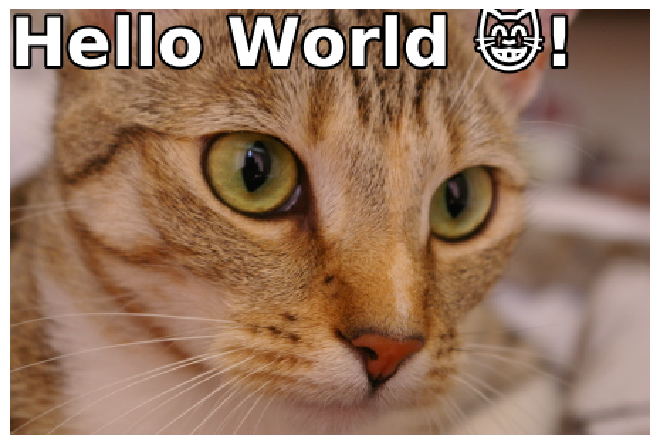

In [3]:
fig = plt.figure()
fig.figimage(img, resize=True)

text = "Hello World 😸!"
fontsize = 34
x_pos = 0
y_pos = 0.99
color = "white"
weight = "bold"
ha = "left"
va = "top"

outline_color = "black"
outline_width = 3

# Main text
txt = fig.text(x_pos, y_pos, text, fontsize=fontsize, color=color, weight=weight, 
               horizontalalignment=ha, verticalalignment=va)

# Apply white outline using path_effects
outline_effect = patheffects.withStroke(linewidth=outline_width, foreground=outline_color)
txt.set_path_effects([outline_effect])

fig.canvas.draw()
annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
plt.close(fig)

fig, ax = plt.subplots()
ax.imshow(annotated_img)
ax.set_axis_off()
ax.set_position([0, 0, 1, 1])
plt.show()

Now convert it into a reusable function

In [4]:
def place_text_on_image(img,
                        text,
                        fontsize=34,
                        x_pos = 0, 
                        y_pos = 0.99, 
                        color = "white", 
                        weight = "bold", 
                        ha = "left", 
                        va = "top", 
                        outline_color = "black", 
                        outline_width = 3):
    fig = plt.figure()
    fig.figimage(img, resize=True)

    # Main text
    txt = fig.text(x_pos, y_pos, text, fontsize=fontsize, color=color, weight=weight, 
                horizontalalignment=ha, verticalalignment=va)

    # Apply white outline using path_effects
    outline_effect = patheffects.withStroke(linewidth=outline_width, foreground=outline_color)
    txt.set_path_effects([outline_effect])

    fig.canvas.draw()
    annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)
    return annotated_img

def display_image(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_position([0, 0, 1, 1])
    plt.show()

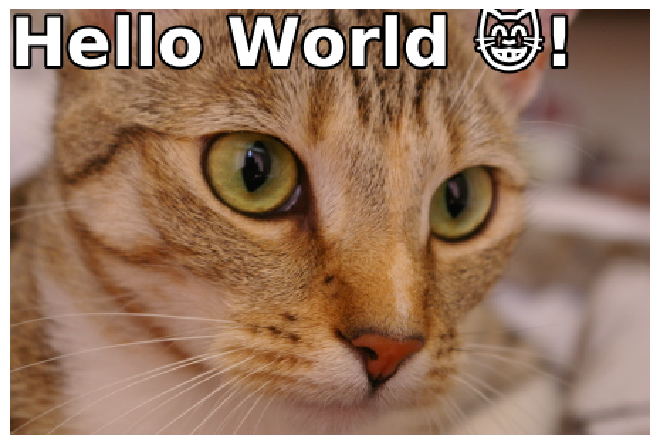

In [5]:
annotated_img = place_text_on_image(img, "Hello World 😸!")
display_image(annotated_img)

In [6]:
img2 = data.microaneurysms()
img2.dtype, img2.shape

(dtype('uint8'), (102, 102))

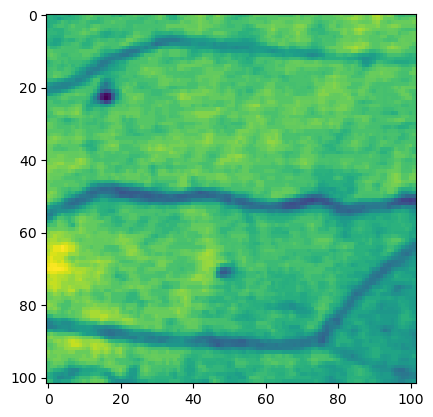

In [7]:
plt.imshow(img2)

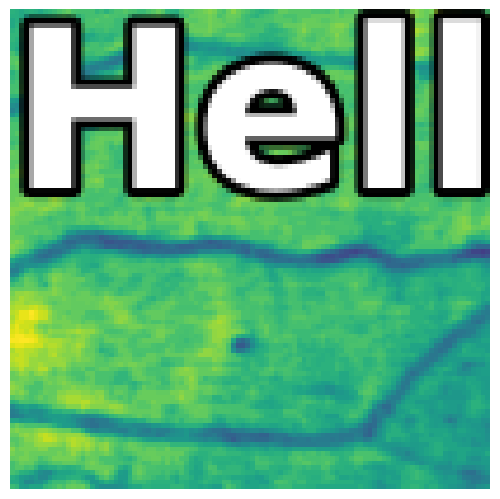

In [8]:
annotated_img2 = place_text_on_image(img2, "Hello World 😸!")
display_image(annotated_img2)

Oops, let's fix that

In [9]:
def place_text_on_image(img,
                        text,
                        x_pos = 0, 
                        y_pos = 0.99, 
                        color = "white", 
                        weight = "bold", 
                        ha = "left", 
                        va = "top", 
                        outline_color = "black", 
                        outline_width = 3):
    fig = plt.figure()
    fig.figimage(img, resize=True)

    fontsize = 34/400*img.shape[0]

    # Main text
    txt = fig.text(x_pos, y_pos, text, fontsize=fontsize, color=color, weight=weight, 
                horizontalalignment=ha, verticalalignment=va)

    # Apply white outline using path_effects
    outline_effect = patheffects.withStroke(linewidth=outline_width, foreground=outline_color)
    txt.set_path_effects([outline_effect])

    fig.canvas.draw()
    annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)
    return annotated_img


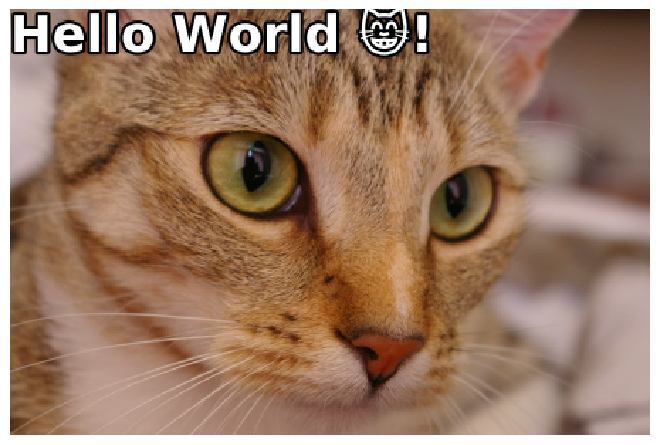

In [10]:
annotated_img = place_text_on_image(img, "Hello World 😸!")
display_image(annotated_img)

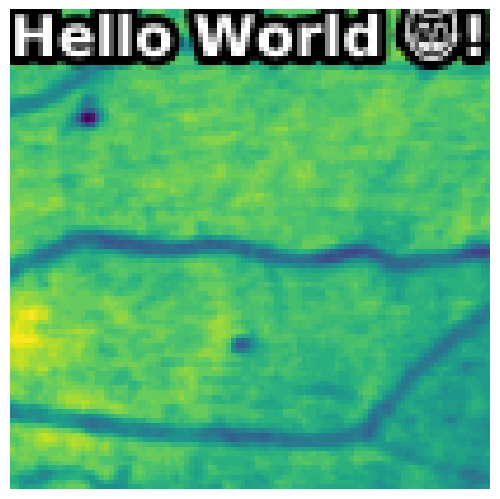

In [11]:
annotated_img2 = place_text_on_image(img2, "Hello World 😸!")
display_image(annotated_img2)

Good enough! To do it right, I'd need to use Pillow, and specify the font file to use. Since that's not portable we'd have to ship the `.ttf` with the plugin, or embed it somehow. It's a whole thing, and out of scope for a simple hello world.